In [1]:
from preamble import *
%matplotlib inline

# Ch01 引言

机器学习（Machine Learning）是从数据中提取知识。
它是统计学、人工智能和计算机科学交叉的研究领域，也被称为预测分析（Predictive Analysis）或者统计学习（Statistical Learning）。

## 1.1 为什么选择机器学习？

学习算法的分类：
- 有监督机器学习算法（Supervised Learning Algorithm)：从成对的输入/输出数据中进行学习的机器学习算法。
- 无监督机器学习算法（Unsupervised Learning Algorithm）：只有输入数据是已知的，没有为算法提供输出数据。

学习算法的特征(Feature)：
- 在机器学习中，每个实体被称为一个样本（Sample）或者数据点。
- 在机器学习中，每个用来描述实体的属性被称为特征（Feature）。

特征提取（Feature Extraction）或者 特征工程（Feature Engineering）：构建良好的数据表征。

机器学习的常见问题：

-   本次任务的目标是什么？
-   数据能否支持目标的寻找？
-   目标如何转化成机器学习问题？
-   数据能否用于机器学习模型？
-   数据能够提取哪些特征？
-   特征能否用于实现正确的预测？
-   学习的模型是否能够达成目标？
-   已知的解决文案能够为本次任务提供支持？

## 1.2 为什么选择Python？

Python（3.7）：是许多数据科学应用的通用语言。易于使用，工具丰富。

## 1.4 必要的库和工具：

- scikit-learn（0.21.2）：包含许多先进的机器学习算法。依赖于另外两个Python包（NumPy和SciPy）。
- numpy（1.16.2）：包括多维数组、高级数学函数（线性代数运算和Fourier变换），以及伪随机数生成器。
- scipy（1.3.0）：用于科学计算的函数集合。具有线性代数高级函数、数学函数优化、信号处理、特征数学函数和统计分布等多项功能。
    - scipy.sparse：可以给出稀疏矩阵
- matplotlib（3.1.1）：科学绘图库，生成可以发布的可视化内容，如：拆线图、直方图、散点图等。
- pandas（0.24.2）：处理和分析数据。基于DataFrame的数据结构，DataFrame是一张表格，类似于Excel的表格。
    - pandas提供了操作和修改表格的方法，可以方便地连接和查询表格。
    - pandas可以接收每列数据的类型互不相同。
    - pandas可以从不同的文件格式和数据库中提取数据
    - pandas最好的参考书《利用Python进行数据分析》第一版（Python 2.6）第二版（Python 3.6）。
- mglearn（0.1.7）：本书作者开发的工具包，使用这个包就可以获得相关的数据文件。

以下两个包只有Ch07（案例）才需要
- NLTK(3.4.5)：自然语言处理的工具包
- Spacy（2.2.1）：工业级别的自然语言处理工具包

软件安装工具：
- Anaconda：帮助安装Scikit-Learn工具包，辅助安装Intel MKL库，提升许多算法的速度。
    - 使用 `environment.yml` 文件可以一次性安装所有依赖软件包
- Enthought Canopy：预先安装了NumPy，SciPy，MatplotLib，Pandas，IPython，但是没有安装Scikit-Learn。
- Python(x,y)：专门为Windows打造的Python科学计算免费发行版。预先安装了NumPy，SciPy，Matplot Lib，Pandas，IPython，Scikit-Learn。

#### Jupyter Notebook

#### NumPy
注：书中介绍较少，建议先基于《Python进行数据分析》学习 numpy、scipy 和 pandas。

In [2]:
import numpy as np
# 创建一个ndarray类的对象，是一个二维NumPy数组，也叫数组。
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

SciPy的矩阵形式：
- bsr_matrix: Block Sparse Row matrix
- coo_matrix: COOrdinate format matrix
- csc_matrix: Compressed Sparse Column matrix
- csr_matrix: Compressed Sparse Row matrix
- dia_matrix: A sparse matrix with diagonal storage
- dok_matrix: Dictionary Of Keys based the sparse matrix.
- lil_matrix: Row-based linked list sparse matrix

注：SciPy 的学习可以参考 《Scipy Lecture Notes》(http://scipy-lectures.org/)

In [3]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
# 创建一个二维NumPy数组，对角线为1，其余为0，稀疏矩阵（Sparse Matrix）的稠密表示（Dense Representation）
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


CSR格式比COO格式保存要多30%的内存占用率。

COO格式一经定义后shape就不可再修改，但是data, row, col还可以修改。

In [4]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
# 转换稀疏数组的表示方式为SciPy的CSR格式。仅保留非零数据
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
# 转换稀疏数组的表示方式为SciPy的COO格式
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
    # 输出一个全1的4*1向量
    print('\n--------')
    data = np.ones(4)
    print('NumPy array:\n{}'.format(data))
    # 将之转化为COO格式的稀疏矩阵
    row_indices = np.arange(4)
    col_indices = np.arange(4)
    eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
    print('\nCOO representation:\n{}'.format(eye_coo))


--------
NumPy array:
[1. 1. 1. 1.]

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

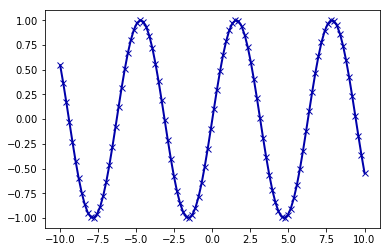

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
# 生成一个序列，序列范围是-10到10，总共100个数
x = np.linspace(-10, 10, 100)
# Create a second array using sine
# 使用 sin 函数 生成第二个序列
y = np.sin(x)
# The plot function makes a line chart of one array against another
# plot 函数生成一个曲线图表
plt.plot(x, y, marker="x")

#### pandas

In [8]:
import pandas as pd

# create a simple dataset of people
# 生成一个简单的人群数据集
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [9]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### mglearn

### Python 2 versus Python 3

### Versions Used in this Book

In [10]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.6.7 (default, Dec  6 2019, 07:03:06) [MSC v.1900 64 bit (AMD64)]
pandas version: 1.1.1
matplotlib version: 2.2.2
NumPy version: 1.19.1
SciPy version: 1.5.2
IPython version: 7.10.1
scikit-learn version: 0.23.2


### A First Application: Classifying Iris Species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the Data

In [11]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [12]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [14]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [15]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [17]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [18]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [20]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [21]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [24]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C718B70>,
      dtype=object)

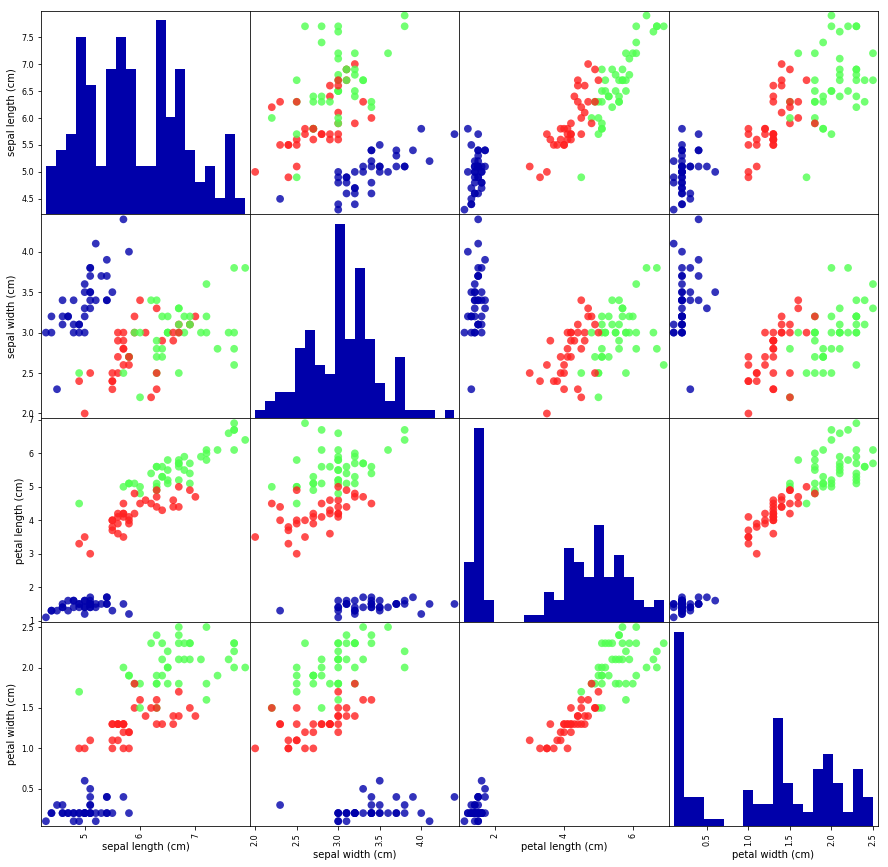

In [25]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

#### Building Your First Model: k-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [29]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [32]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
